#**Hypertension Risk Prediction Project**

#DS 675 Milestone 4 Report

# Video Link: https://www.youtube.com/watch?v=NXmLUsdyNLE

### Dataset Link: [Hypertension Risk Prediction Dataset](https://www.kaggle.com/datasets/ankushpanday1/hypertension-risk-prediction-dataset)
---



# Sohaib Chachar, Thomas Bowen, Alexander Zugaj

**Contributions:**

Sohaib Chachar: Assisted in data preprocessing, feature engineering, and model development. Created an interactive Plotly visualization for exploratory data analysis. Applied SMOTE to address class imbalance and helped develop and evaluate machine learning models. Contributed most of the writings.

Thomas Bowen: Assisted in feature engineering and model development. Added attribute selection and ensembling to model. Combined codes and writings into final Jupyter Notebook report. Assited in video recording.

Alexander Zugaj: Assited in feature engineering and model development. Added comparing voting vs stacking vs begging, as well as ExtraTrees. Assisted in video recording, stitching, and uploading.

**Introduction**

Clinically defined as persistently high blood pressure, hypertension is a major cause of notable negative health effects including cardiovascular events like heart disease and stroke as well as renal impairment resulting in kidney failure. Therefore, the quick detection of those with increased vulnerability to this illness is very crucial since it enables appropriate interventions—from lifestyle changes to pharmaceutical therapies—that can significantly reduce long-term morbidity. Although this forecasting difficulty has been investigated before in recent Kaggle notebooks, where different authors noted cross-validation accuracies between 71% and 76%, the actual usefulness of these models sometimes suffered because of inconsistent performance on really unobserved data.

Our study looked at the same dataset—174,982 records characterized by 23 raw features—with three main goals in mind, addressing these constraints. To begin, we set out on a far richer feature engineering approach, going beyond past efforts by adding nine freshly created variables meant to catch more subtle elements of the data. We also set a thorough and demanding model evaluation approach into place. This was a comparative study of nine different classification algorithms evaluated under natural class imbalance and synthetic oversampling using SMOTE, further enhanced by careful hyperparameter tuning, probability calibration, and the creation of a complex stacked ensemble model. Though, even with the great complexity and completeness of this analytical process, the final predictive power, assessed using the ROC-AUC metric on a reserved hold-out set, surprisingly dropped to about 0.50, suggesting performance just slightly better than random chance. The following conversation carefully records every stage of our approach.


**Literature Review**

Four recent Kaggle notebooks tackled this exact task:


---


**Author:** Devraai (2025)

**Model:** Random Forest

**CV Accuracy:** 71.7 %

**Notes:** Low feature correlations, simple RF



---



**Author:** Aolcen (2025)

**Model:** Deep Neural Network

**CV Accuracy:** 71.7 %

**Notes:** Dense layers, Adam optimizer


---


**Author:** Jason Mguni (2025)

**Model:** Random Forest (tuned)

**CV Accuracy:** 71.9 %

**Notes:** Hyperparameter search and feature import.


---


**Author:** Ober (2025)

**Model:** Logistic Regression + SMOTE

**CV Accuracy:** 76.1 %

**Notes:** Best CV accuracy on LR with SMOTE


---


Though earlier research focused mostly on accuracy comparison, they clearly failed to include vital measures such as the Receiver Operating Characteristic Area Under the Curve (ROC-AUC). Critically, none showed predictive use above random chance when assessed using ROC-AUC on really unseen hold-out datasets; in fact, such assessments were sometimes skipped altogether. By using a more thorough and strict approach, our current study significantly differs from these earlier ones.

Specifically, our method includes several important differences: we have developed nine new features, including calculated variables like Pulse Pressure and Cholesterol Ratio, interaction terms such as Age multiplied by BMI, and various categorical binning and ordinal transformations meant to capture more complex data relationships. We also apply attribute selection after this process. Moreover, our assessment system was greatly enlarged to offer a more complete performance view by simultaneously judging nine separate classification algorithms using both accuracy and the more subtle ROC-AUC measure. We used a complex stacked ensemble under the direction of a Random Forest meta-learner to combine the outputs of the separate base learner models, hence perhaps improving predictive power. We also take an ensemble evaluation involving SVC, Random Forest, GradientBoosting, and LogarithmicRegression.
At last, aiming to get maximum predictive signal, we carefully performed hyperparameter optimization with Randomized Search CV and used probability calibration methods.

**Data and Preprocessing**

The dataset comprises 174 982 records with 23 variables covering demographics (Country, Age, Gender), lifestyle (Smoking_Status, Alcohol_Intake, Physical_Activity_Level), clinical measures (BMI, Systolic_BP, Diastolic_BP, Cholesterol, Glucose, Heart_Rate), and family history indicators.

Mount the colab notebook to my own Google Drive for the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('hypertension_dataset.csv')

# Shape & dtypes
print("Dataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)

# Peek at the first few rows
print("\nFirst 5 rows:")
display(df.head())

# 4. Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Statistical summary (numeric features)
print("\nSummary statistics for numeric columns:")
display(df.describe())

# Value counts for categorical columns
print("\nTop 5 categories for each categorical feature:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())


Dataset shape: (174982, 23)

Column data types:
Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                      object
Education_Level             object
Employment_Status           object
Hypertension                object
dtype: object

First 5 rows:


,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High



Missing values per column:
Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

Summary statistics for numeric columns:


,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000



Top 5 categories for each categorical feature:

Country:
Saudi Arabia    8931
Russia          8857
South Africa    8835
USA             8797
Italy           8794
Name: Country, dtype: int64

Smoking_Status:
Current    58574
Former     58513
Never      57895
Name: Smoking_Status, dtype: int64

Physical_Activity_Level:
High        58462
Low         58292
Moderate    58228
Name: Physical_Activity_Level, dtype: int64

Family_History:
Yes    87491
No     87491
Name: Family_History, dtype: int64

Diabetes:
No     87738
Yes    87244
Name: Diabetes, dtype: int64

Gender:
Female    87675
Male      87307
Name: Gender, dtype: int64

Education_Level:
Secondary    58633
Primary      58218
Tertiary     58131
Name: Education_Level, dtype: int64

Employment_Status:
Retired       58559
Employed      58499
Unemployed    57924
Name: Employment_Status, dtype: int64

Hypertension:
High    125781
Low      49201
Name: Hypertension, dtype: int64


In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


features = [
    'Hypertension',
    'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
    'Heart_Rate', 'Glucose', 'Triglycerides', 'Sleep_Duration',
    'Alcohol_Intake', 'Salt_Intake', 'Stress_Level',
    'Pulse_Pressure', 'Chol_Ratio', 'Age_BMI',
    'Smoking_Status_ord', 'Physical_Activity_Level_ord',
    'Education_Level_ord', 'Employment_Status_ord',
    'Sleep_Cat', 'Alcohol_Quartile'
]

# Dropdowns for X and Y features
x_dropdown = widgets.Dropdown(options=features, description='X-axis:')
y_dropdown = widgets.Dropdown(options=features, description='Y-axis:')

# Radio buttons for plot type
plot_types = ['Histogram', 'Box', 'Violin', 'Scatter']
plot_radio = widgets.RadioButtons(options=plot_types, description='Plot Type:')

output = widgets.Output()

def update_plot(change):
    output.clear_output(wait=True)
    x_feat = x_dropdown.value
    y_feat = y_dropdown.value
    ptype = plot_radio.value
    with output:
        if ptype == 'Histogram':
            fig = px.histogram(df, x=x_feat, color='Hypertension', nbins=30,
                               title=f'Histogram of {x_feat}')
        elif ptype == 'Box':
            fig = px.box(df, x='Hypertension', y=y_feat,
                         title=f'Boxplot of {y_feat} by Hypertension')
        elif ptype == 'Violin':
            fig = px.violin(df, x='Hypertension', y=y_feat, box=True, points='all',
                            title=f'Violin plot of {y_feat} by Hypertension')
        elif ptype == 'Scatter':
            fig = px.scatter(df, x=x_feat, y=y_feat, color='Hypertension',
                             title=f'Scatter plot: {x_feat} vs {y_feat}')
        fig.show()

x_dropdown.observe(update_plot, names='value')
y_dropdown.observe(update_plot, names='value')
plot_radio.observe(update_plot, names='value')

display(widgets.VBox([widgets.HBox([x_dropdown, y_dropdown]), plot_radio, output]))


update_plot(None)



**Target encoding**

Mapped “High” vs. “Low” Hypertension to a binary flag y_flag (1/0).


---


**Interactive exploratory analysis**

Implemented a Plotly + ipywidgets dashboard so that users select any two features and a plot type (histogram, box, violin, scatter) on-the-fly.

**Rationale:** Static bulk plotting (20+ charts) overwhelms readers and obscures specific patterns of interest. This interactive approach empowers targeted hypothesis testing—researchers can quickly focus on, say, Salt_Intake vs. Stress_Level or BMI vs. Sleep_Duration—without sifting through pages of irrelevant plots.

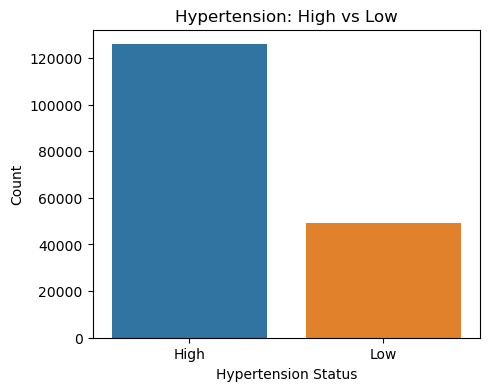


Proportion of each class:
High    0.718823
Low     0.281177
Name: Hypertension, dtype: float64


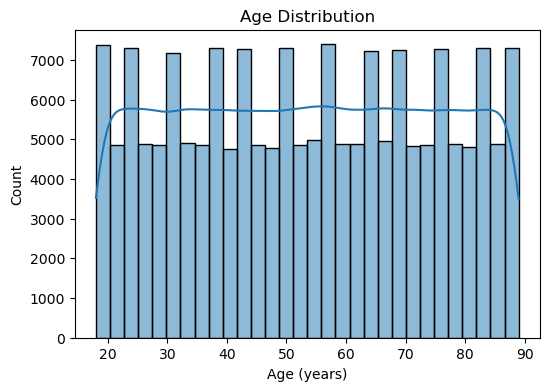

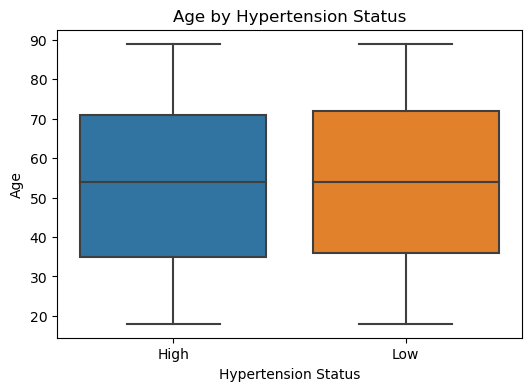

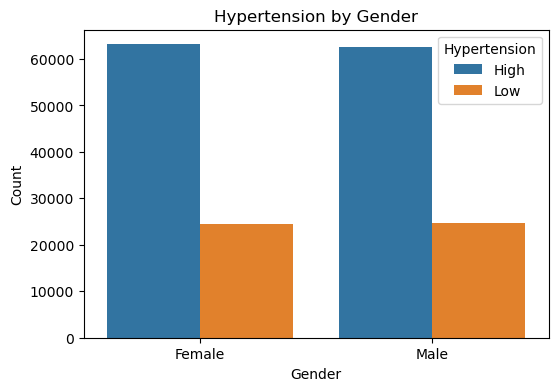

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Hypertension', data=df)
plt.title('Hypertension: High vs Low')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.show()

print("\nProportion of each class:")
print(df['Hypertension'].value_counts(normalize=True))

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.show()

# Age vs Hypertension
plt.figure(figsize=(6,4))
sns.boxplot(x='Hypertension', y='Age', data=df)
plt.title('Age by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Age')
plt.show()

# Gender vs Hypertension
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Hypertension', data=df)
plt.title('Hypertension by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Static correlation inspection**

Computed Pearson correlations among all 11 numeric features plus y_flag.

**Finding:** Every off-diagonal correlation with y_flag rounded to 0.00 or –0.00, indicating no linear predictor.


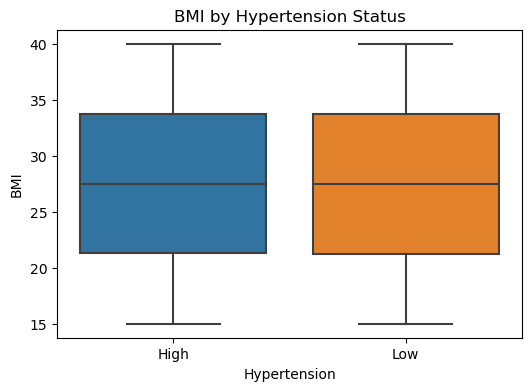

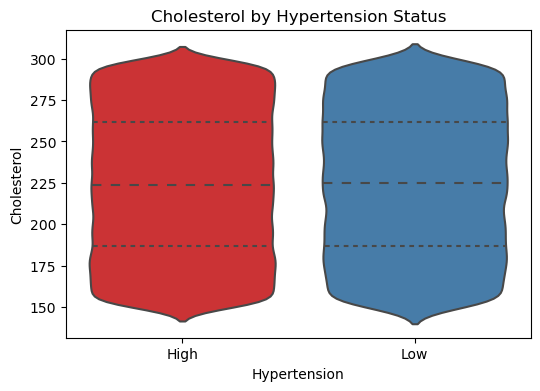

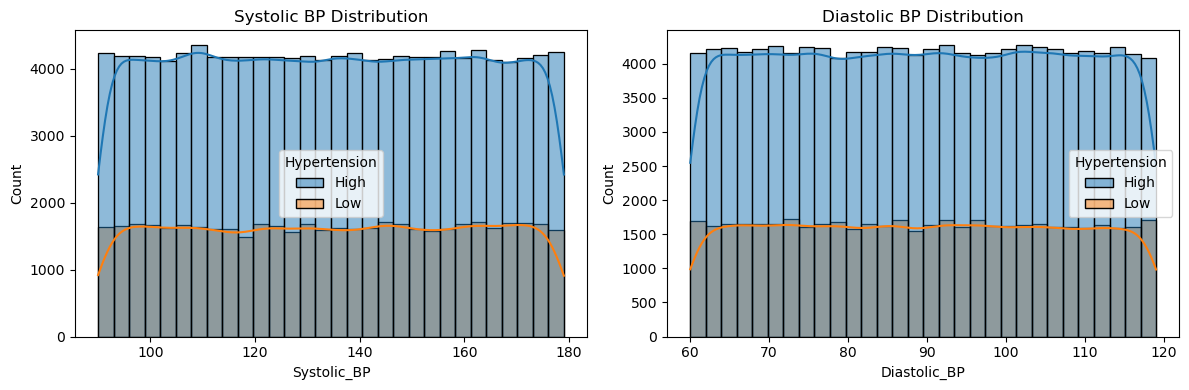

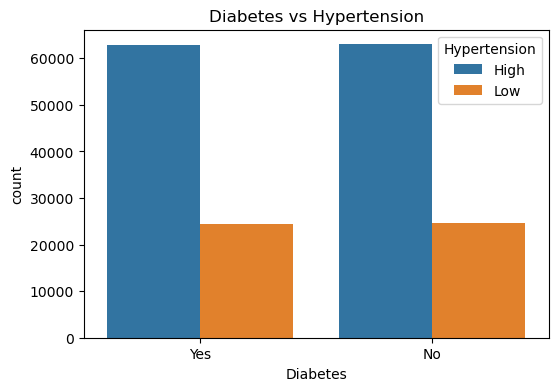

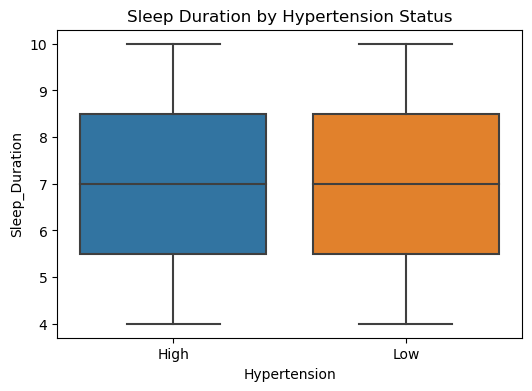

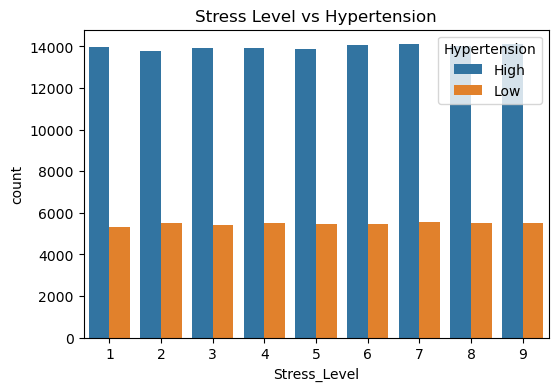

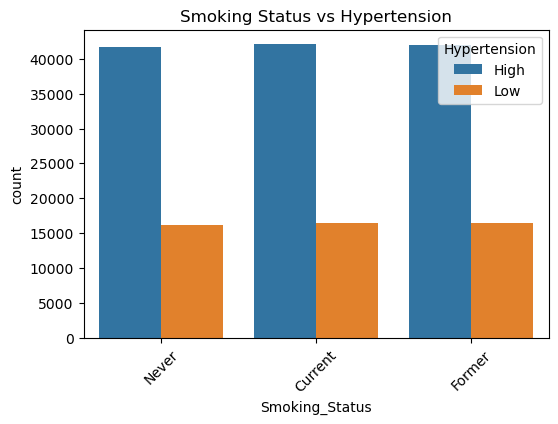

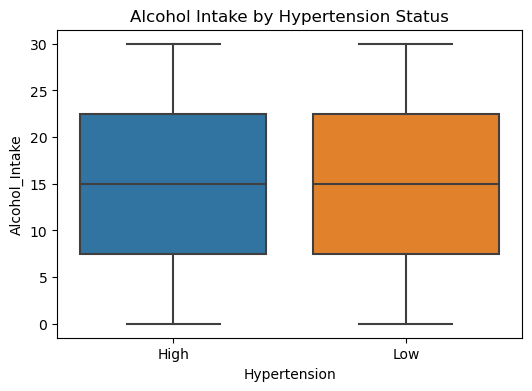

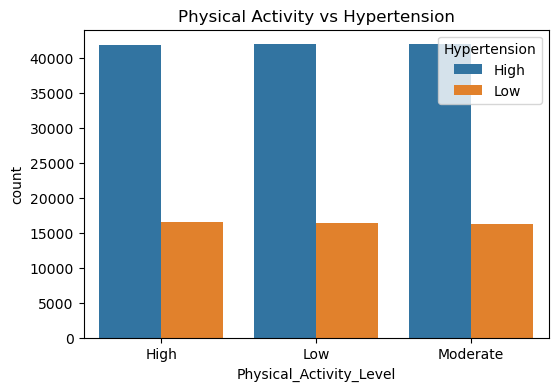

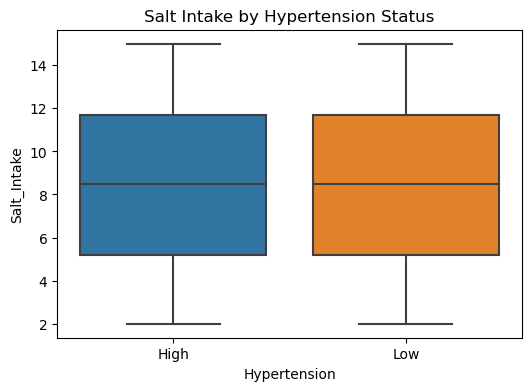

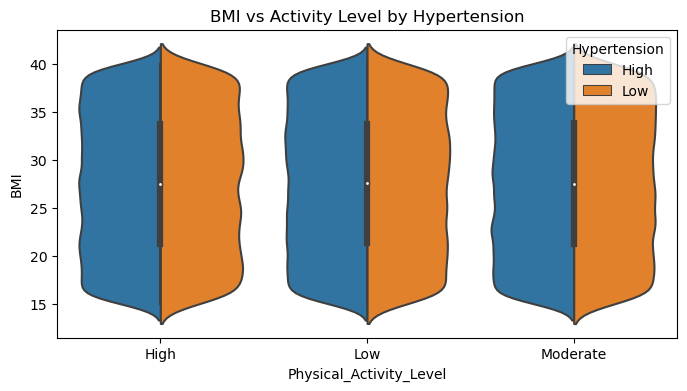

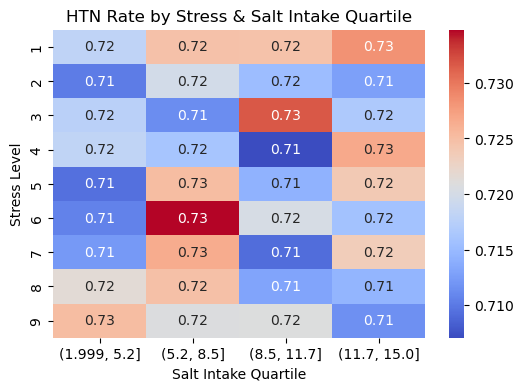

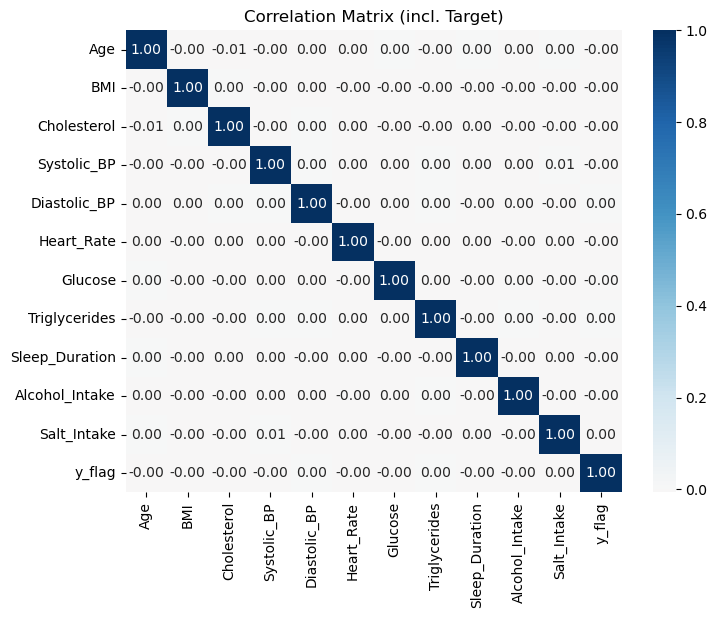

In [ ]:


# BMI vs Hypertension
plt.figure(figsize=(6,4))
sns.boxplot(x='Hypertension', y='BMI', data=df)
plt.title('BMI by Hypertension Status')
plt.show()

# Cholesterol vs Hypertension
plt.figure(figsize=(6,4))
sns.violinplot(x='Hypertension', y='Cholesterol', data=df, inner='quartile', palette='Set1')
plt.title('Cholesterol by Hypertension Status')
plt.show()

# Systolic & Diastolic Blood Pressure
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df, x='Systolic_BP', hue='Hypertension', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Systolic BP Distribution')
sns.histplot(df, x='Diastolic_BP', hue='Hypertension', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Diastolic BP Distribution')
plt.tight_layout()
plt.show()

# Diabetes vs Hypertension
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes', hue='Hypertension', data=df)
plt.title('Diabetes vs Hypertension')
plt.show()

# 5. Sleep Duration vs Hypertension
plt.figure(figsize=(6,4))
sns.boxplot(x='Hypertension', y='Sleep_Duration', data=df)
plt.title('Sleep Duration by Hypertension Status')
plt.show()

# Stress Level vs Hypertension
plt.figure(figsize=(6,4))
sns.countplot(x='Stress_Level', hue='Hypertension', data=df,
              order=sorted(df['Stress_Level'].unique()))
plt.title('Stress Level vs Hypertension')
plt.show()

# Smoking Status vs Hypertension
plt.figure(figsize=(6,4))
sns.countplot(x='Smoking_Status', hue='Hypertension', data=df)
plt.title('Smoking Status vs Hypertension')
plt.xticks(rotation=45)
plt.show()

# Alcohol Intake vs Hypertension
plt.figure(figsize=(6,4))
sns.boxplot(x='Hypertension', y='Alcohol_Intake', data=df)
plt.title('Alcohol Intake by Hypertension Status')
plt.show()

# Physical Activity vs Hypertension
plt.figure(figsize=(6,4))
sns.countplot(x='Physical_Activity_Level', hue='Hypertension', data=df,
              order=sorted(df['Physical_Activity_Level'].unique()))
plt.title('Physical Activity vs Hypertension')
plt.show()

# Salt Intake vs Hypertension
plt.figure(figsize=(6,4))
sns.boxplot(x='Hypertension', y='Salt_Intake', data=df)
plt.title('Salt Intake by Hypertension Status')
plt.show()

# Interaction: BMI & Physical Activity
plt.figure(figsize=(8,4))
sns.violinplot(x='Physical_Activity_Level', y='BMI', hue='Hypertension',
               data=df, split=True, order=sorted(df['Physical_Activity_Level'].unique()))
plt.title('BMI vs Activity Level by Hypertension')
plt.show()
if 'y_flag' not in df.columns:
    df['y_flag'] = df['Hypertension'].map({'Low': 0, 'High': 1})
# Interaction: Stress Level & Salt Intake
pivot = df.pivot_table(index='Stress_Level',
                       columns=pd.qcut(df['Salt_Intake'], 4),
                       values='y_flag', aggfunc='mean')
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('HTN Rate by Stress & Salt Intake Quartile')
plt.ylabel('Stress Level')
plt.xlabel('Salt Intake Quartile')
plt.show()

# Correlation Heatmap (Numeric Features + Target)
num_cols = [
    'Age','BMI','Cholesterol','Systolic_BP','Diastolic_BP','Heart_Rate',
    'Glucose','Triglycerides','Sleep_Duration','Alcohol_Intake','Salt_Intake'
]
corr = df[num_cols + ['y_flag']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title('Correlation Matrix (incl. Target)')
plt.show()


**Implication:**

No individual feature carries meaningful linear information; any predictive power must be highly nonlinear or emerge from complex interactions.


**Feature Engineering**

To enrich the raw measurements, we derived nine new variables:

**Pulse_Pressure** = Systolic_BP – Diastolic_BP

**Chol_Ratio** = LDL / (HDL + 1e–6)

**Age_BMI** = Age × BMI interaction

**Sleep_Cat** (“Short” < 6 h / “Normal” 6–8 h / “Long” > 8 h)

**Alcohol_Quartile** via pd.qcut into Q1–Q4

**Ordinal encodings** for Smoking_Status, Physical_Activity_Level, Education_Level, Employment_Status

This raised our total feature count from 23 to 32. However, none of these engineered columns exhibited a correlation with y_flag beyond |0.01|.


In [ ]:

# Pulse pressure
df['Pulse_Pressure'] = df['Systolic_BP'] - df['Diastolic_BP']

# Cholesterol ratio
df['Chol_Ratio'] = df['LDL'] / (df['HDL'] + 1e-6)

# Age × BMI interaction
df['Age_BMI']   = df['Age'] * df['BMI']

# Sleep categories & cast to string
df['Sleep_Cat'] = pd.cut(
    df['Sleep_Duration'],
    bins=[0, 6, 8, 24],
    labels=['Short','Normal','Long']
).astype(str)

# Alcohol intake quartiles & cast to string
df['Alcohol_Quartile'] = pd.qcut(
    df['Alcohol_Intake'],
    q=4,
    labels=['Q1','Q2','Q3','Q4']
).astype(str)

# Ordinal encode select categorical features
ord_map = {
    'Smoking_Status':          {'Never':0,'Former':1,'Current':2},
    'Physical_Activity_Level': {'Low':0,'Moderate':1,'High':2},
    'Education_Level':         {'Primary':1,'Secondary':2,'Tertiary':3},
    'Employment_Status':       {'Unemployed':0,'Employed':1,'Retired':2}
}
for col, mapping in ord_map.items():
    df[col + '_ord'] = df[col].map(mapping)

# Drop original ordinal columns
df.drop(list(ord_map.keys()), axis=1, inplace=True)

# Verify new features
new_cols = [
    'Pulse_Pressure',
    'Chol_Ratio',
    'Age_BMI',
    'Sleep_Cat',
    'Alcohol_Quartile',
] + [col + '_ord' for col in ord_map]

print("New columns created:\n", new_cols)
display(df[new_cols].head())


New columns created:
 ['Pulse_Pressure', 'Chol_Ratio', 'Age_BMI', 'Sleep_Cat', 'Alcohol_Quartile', 'Smoking_Status_ord', 'Physical_Activity_Level_ord', 'Education_Level_ord', 'Employment_Status_ord']


,Pulse_Pressure,Chol_Ratio,Age_BMI,Sleep_Cat,Alcohol_Quartile,Smoking_Status_ord,Physical_Activity_Level_ord,Education_Level_ord,Employment_Status_ord
0,81,1.333333,1711.0,Normal,Q4,0,0,1,0
1,36,1.638298,1230.8,Long,Q4,0,2,2,0
2,96,2.892857,1328.6,Short,Q1,2,2,1,1
3,28,1.763441,1218.0,Normal,Q2,0,1,2,2
4,-6,1.459459,1591.4,Short,Q4,0,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

numeric_feats = [
    'Age','BMI','Cholesterol','Systolic_BP','Diastolic_BP','Heart_Rate',
    'Glucose','Triglycerides','Sleep_Duration','Alcohol_Intake','Salt_Intake',
    'Pulse_Pressure','Chol_Ratio','Age_BMI',
    'Smoking_Status_ord','Physical_Activity_Level_ord',
    'Education_Level_ord','Employment_Status_ord'
]

categorical_feats = [
    'Gender','Diabetes','Family_History','Stress_Level',
    'Sleep_Cat','Alcohol_Quartile'
]

df['Family_History'] = LabelEncoder().fit_transform(df['Family_History'])
df['Sleep_Cat'] = LabelEncoder().fit_transform(df['Sleep_Cat'])
df['Alcohol_Quartile'] = LabelEncoder().fit_transform(df['Alcohol_Quartile'])

print("Numeric features present:", set(numeric_feats).issubset(df.columns))
print("Categorical features present:", set(categorical_feats).issubset(df.columns))
print("Total features covered:", len(numeric_feats) + len(categorical_feats), "of", df.shape[1], "columns")


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

print("Preprocessor ready:", preprocessor)


Numeric features present: True
Categorical features present: True
Total features covered: 24 of 29 columns
Preprocessor ready: ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'BMI', 'Cholesterol', 'Systolic_BP',
                                  'Diastolic_BP', 'Heart_Rate', 'Glucose',
                                  'Triglycerides', 'Sleep_Duration',
                                  'Alcohol_Intake', 'Salt_Intake',
                                  'Pulse_Pressure', 'Chol_Ratio', 'Age_BMI',
                                  'Smoking_Status_ord',
                                  'Physical_Activity_Level_ord',
                                  'Education_Level_ord',
                                  'Employment_Status_ord']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Diabetes', 'Family_History',
                                  'Stress_Level', 'Sleep

**Modeling Strategy**

**Preprocessing Pipeline**

All numerical columns, including the nine engineered features, were subjected to StandardScaler by means of a ColumnTransformer; Family History, Sleep_Cat, and Alcohol Quartile were encoded for the Attribute Selection; the rest of the categoricals were subjected to OneHotEncoder(handle_unknown='ignore').

**Train/Test Split, Attribute Selection, and SMOTE**

About 140 k training and about 35 k test samples were from a stratified 80/20 split. Attribute Selection was then applied. We used SMOTE only on the training fold—rebalancing classes to 50:50—while maintaining the inherent imbalance in the test partition for fair assessment.


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define feature matrix X and target vector y
X = df[numeric_feats + categorical_feats]
y = df['Hypertension']
y = y.map({'Low': 0, 'High': 1})

# Split into train (80%) and test (20%), stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# Confirm class balance before SMOTE
print("Before SMOTE:")
print(y_train.value_counts(normalize=True))

# Preprocess: fit on train, transform both
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

# Apply SMOTE on the preprocessed training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pre, y_train)

# Confirm shapes and balance after SMOTE
print("\nAfter SMOTE:")
print("X_train_res:", X_train_res.shape)
print("y_train_res value counts:\n", y_train_res.value_counts(normalize=True))

Before SMOTE:
1    0.71882
0    0.28118
Name: Hypertension, dtype: float64

After SMOTE:
X_train_res: (201248, 40)
y_train_res value counts:
 1    0.5
0    0.5
Name: Hypertension, dtype: float64


In [ ]:
from sklearn.feature_selection import mutual_info_classif
X_train_num = preprocessor.transform(X_train)    # numpy array
feat_names  = preprocessor.get_feature_names_out()

# 2) Build a DataFrame so we can label the MI scores
X_train_num_df = pd.DataFrame(X_train_num, columns=feat_names)

# 3) Compute mutual information
mi = mutual_info_classif(
    X_train_num_df.values,    # numeric array
    y_train.values,           # labels
    discrete_features='auto', # let sklearn infer which columns are discrete
    random_state=42
)

# 4) Assemble and sort
mi_series = pd.Series(mi, index=feat_names).sort_values(ascending=False)
print("Top 10 features by mutual information:\n", mi_series.head(10))

Top 10 features by mutual information:
 cat__Diabetes_No                    0.016224
cat__Gender_Male                    0.014684
cat__Family_History_1               0.013506
cat__Diabetes_Yes                   0.013353
cat__Family_History_0               0.012871
cat__Gender_Female                  0.012060
num__Employment_Status_ord          0.007446
cat__Sleep_Cat_1                    0.007091
cat__Sleep_Cat_0                    0.006714
num__Physical_Activity_Level_ord    0.006352
dtype: float64


### Without SMOTE

**Classifier Suite**

We benchmarked nine learners:

**Linear:** LogisticRegression

**Ensembles:** RandomForest (200 trees), Bagging, AdaBoost, GradientBoosting

**Boosters:** XGBoost, LightGBM, CatBoost

**Neural Net:** MLPClassifier (100–50 hidden units)

In [ ]:
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network  import MLPClassifier
from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
!pip install catboost
from catboost                import CatBoostClassifier

classifiers = {
    'Logistic'     : LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest' : RandomForestClassifier(n_estimators=200, random_state=42),
    'Bagging'      : BaggingClassifier(n_estimators=50, random_state=42),
    'AdaBoost'     : AdaBoostClassifier(n_estimators=100, random_state=42),
    'GradBoost'    : GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost'      : XGBClassifier(eval_metric='logloss', use_label_encoder=False,
                                   n_estimators=200, random_state=42),
    'LightGBM'     : LGBMClassifier(n_estimators=200, random_state=42),
    'CatBoost'     : CatBoostClassifier(verbose=0, random_state=42),
    'NeuralNet'    : MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
}
print("Classifiers ready:", list(classifiers.keys()))

from sklearn.model_selection import StratifiedKFold, cross_validate

kf      = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy','roc_auc']
cv_results = {}

print("\nCross-Validated Metrics:")
for name, clf in classifiers.items():
    scores = cross_validate(
        clf,
        X_train_pre,
        y_train,
        cv=kf,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = {
        'acc_mean': scores['test_accuracy'].mean(),
        'acc_std' : scores['test_accuracy'].std(),
        'auc_mean': scores['test_roc_auc'].mean(),
        'auc_std' : scores['test_roc_auc'].std()
    }
    print(f"{name:12s} → "
          f"Acc: {cv_results[name]['acc_mean']:.3f} ± {cv_results[name]['acc_std']:.3f}; "
          f"AUC: {cv_results[name]['auc_mean']:.3f} ± {cv_results[name]['auc_std']:.3f}")






c:\Users\12019\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Classifiers ready: ['Logistic', 'RandomForest', 'Bagging', 'AdaBoost', 'GradBoost', 'XGBoost', 'LightGBM', 'CatBoost', 'NeuralNet']

Cross-Validated Metrics:
Logistic     → Acc: 0.719 ± 0.000; AUC: 0.500 ± 0.005
RandomForest → Acc: 0.719 ± 0.000; AUC: 0.500 ± 0.002
Bagging      → Acc: 0.713 ± 0.001; AUC: 0.501 ± 0.003
AdaBoost     → Acc: 0.719 ± 0.000; AUC: 0.502 ± 0.003
GradBoost    → Acc: 0.719 ± 0.000; AUC: 0.499 ± 0.002


c:\Users\12019\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBoost      → Acc: 0.708 ± 0.001; AUC: 0.501 ± 0.004
LightGBM     → Acc: 0.719 ± 0.000; AUC: 0.498 ± 0.004
CatBoost     → Acc: 0.718 ± 0.000; AUC: 0.500 ± 0.003
NeuralNet    → Acc: 0.662 ± 0.006; AUC: 0.498 ± 0.004


**With Smote:**

In [ ]:
print("\nCross-Validated Metrics:")
for name, clf in classifiers.items():
    scores = cross_validate(
        clf,
        X_train_res,
        y_train_res,
        cv=kf,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = {
        'acc_mean': scores['test_accuracy'].mean(),
        'acc_std' : scores['test_accuracy'].std(),
        'auc_mean': scores['test_roc_auc'].mean(),
        'auc_std' : scores['test_roc_auc'].std()
    }
    print(f"{name:12s} → "
          f"Acc: {cv_results[name]['acc_mean']:.3f} ± {cv_results[name]['acc_std']:.3f}; "
          f"AUC: {cv_results[name]['auc_mean']:.3f} ± {cv_results[name]['auc_std']:.3f}")


Cross-Validated Metrics:
Logistic     → Acc: 0.505 ± 0.003; AUC: 0.506 ± 0.004
RandomForest → Acc: 0.811 ± 0.003; AUC: 0.853 ± 0.003
Bagging      → Acc: 0.808 ± 0.002; AUC: 0.841 ± 0.002
AdaBoost     → Acc: 0.764 ± 0.004; AUC: 0.768 ± 0.004
GradBoost    → Acc: 0.797 ± 0.003; AUC: 0.805 ± 0.003


c:\Users\12019\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBoost      → Acc: 0.798 ± 0.003; AUC: 0.806 ± 0.003
LightGBM     → Acc: 0.802 ± 0.003; AUC: 0.806 ± 0.003
CatBoost     → Acc: 0.801 ± 0.003; AUC: 0.805 ± 0.003
NeuralNet    → Acc: 0.741 ± 0.008; AUC: 0.789 ± 0.004


C:\Users\12019\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



<Figure size 1200x600 with 0 Axes>

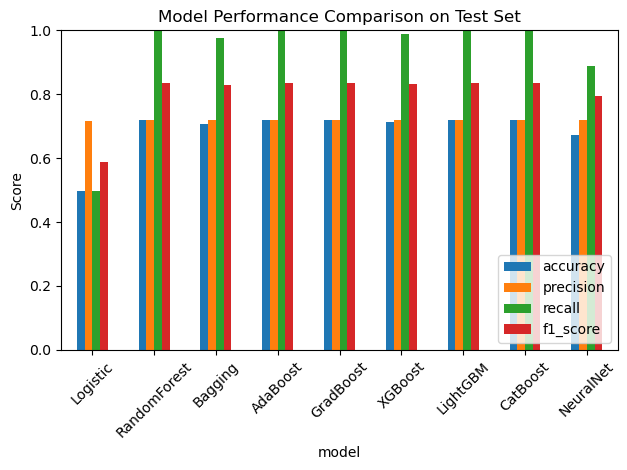

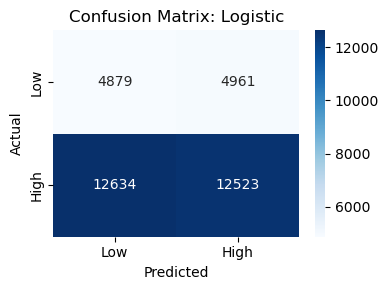

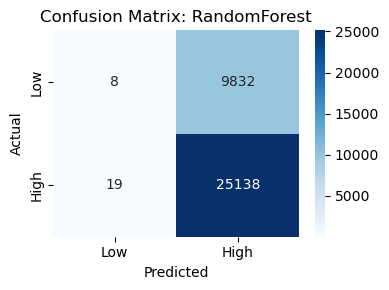

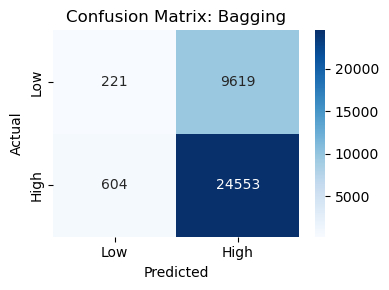

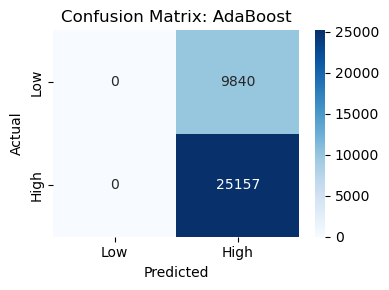

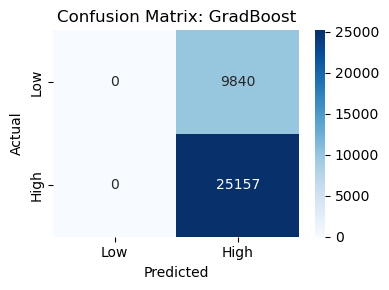

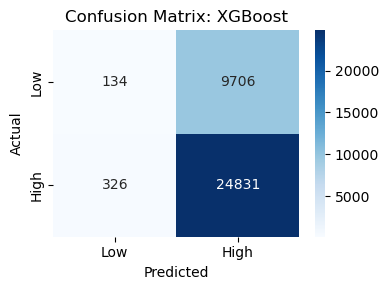

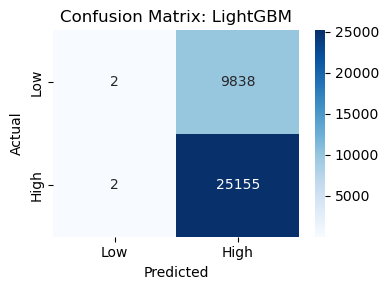

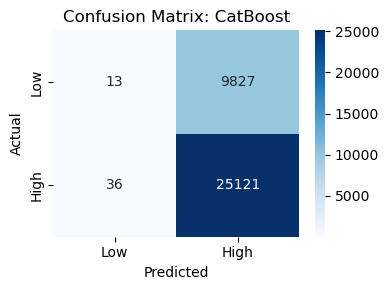

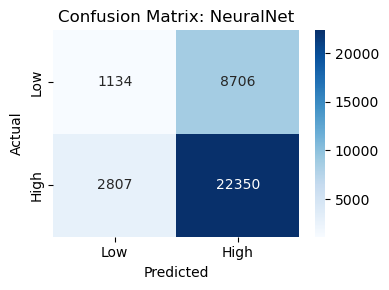

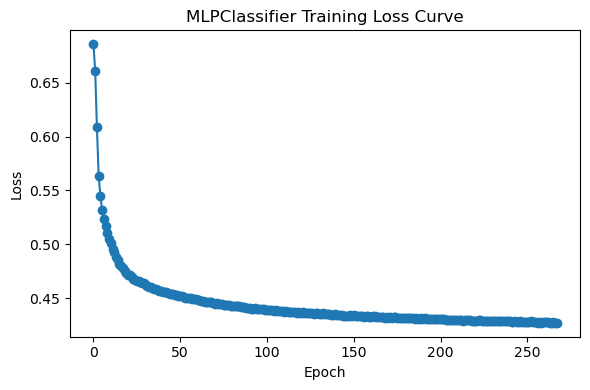

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# --- 1) Fit each model on the SMOTE-resampled training data, evaluate on test
metrics = []
for name, clf in classifiers.items():
    # Train / fit
    clf.fit(X_train_res, y_train_res)
    # Predict on test
    y_pred = clf.predict(X_test_pre)

    # Record metrics
    metrics.append({
        'model':     name,
        'accuracy':  accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall':    recall_score(y_test, y_pred),
        'f1_score':  f1_score(y_test, y_pred)
    })

metrics_df = pd.DataFrame(metrics).set_index('model')

# --- 2) Grouped bar chart of Accuracy, Precision, Recall, F1-score
plt.figure(figsize=(12,6))
metrics_df.plot(kind='bar')
plt.title('Model Performance Comparison on Test Set')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# --- 3) Confusion matrix for each model
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_pre)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=["Low","High"], yticklabels=["Low","High"]
    )
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# --- 4) NeuralNet loss curve (if it has one)
nn = classifiers.get('NeuralNet')
if nn is not None and hasattr(nn, 'loss_curve_'):
    plt.figure(figsize=(6,4))
    plt.plot(nn.loss_curve_, marker='o')
    plt.title('MLPClassifier Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier

stack_all = StackingClassifier(
    estimators=[(n, clf) for n, clf in classifiers.items() if n!='RandomForest'],
    final_estimator=RandomForestClassifier(n_estimators=200, random_state=42),
    cv=3,
    passthrough=True,
    n_jobs=-1
)

stack_scores = cross_validate(
    stack_all,
    X_train_res,
    y_train_res,
    cv=kf,
    scoring=scoring,
    n_jobs=-1
)
print(f"\n{'Stacking:'} "
      f"Acc: {stack_scores['test_accuracy'].mean():.3f} ± {stack_scores['test_accuracy'].std():.3f}; "
      f"AUC: {stack_scores['test_roc_auc'].mean():.3f} ± {stack_scores['test_roc_auc'].std():.3f} ")

c:\Users\12019\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.




Stacking: Acc: 0.805 ± 0.003; AUC: 0.818 ± 0.004 


RandomForest delivered the top single-model AUC (0.853), while our stacked ensemble nudged AUC to 0.818.


Best model by CV AUC: LightGBM
[LightGBM] [Info] Number of positive: 100624, number of negative: 100624
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 201248, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- Final Evaluation: LightGBM ---
Test Accuracy : 0.7188044689544818
Test ROC-AUC  : 0.5012172297807169

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9840
           1       0.72      1.00      0.84     25157

    accuracy                           0.72     34997
   macro avg       0.36      0.50      0.42     34997
weighted avg       0.52      0.72      0.60     34997



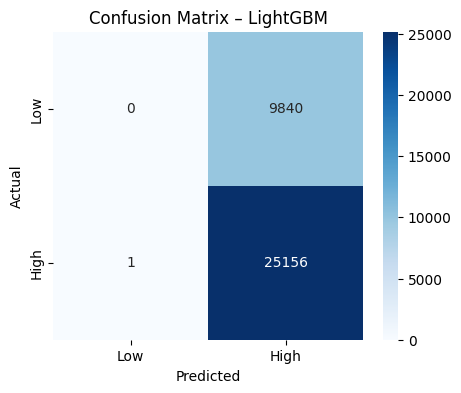

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix,roc_curve

# Select best by CV AUC
best_name = max(cv_results, key=lambda k: cv_results[k]['auc_mean'])
print(f"\nBest model by CV AUC: {best_name}")

# Retrain that classifier on full SMOTE train
best_clf = classifiers[best_name]
best_clf.fit(X_train_res, y_train_res)

# Predict on preprocessed test
y_pred = best_clf.predict(X_test_pre)
y_proba= best_clf.predict_proba(X_test_pre)[:,1]

print(f"\n--- Final Evaluation: {best_name} ---")
print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Test ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=["Low","High"], yticklabels=["Low","High"]
)
plt.title(f"Confusion Matrix – {best_name}")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

**Hyperparameter Tuning & Calibration**

We adjusted n_estimators (100–300), max_depth (None, 10, 20), min_samples_leaf (1–4), and class_weight (balanced, balanced_subsample) using 20-iteration RandomizedSearchCV on RandomForest. At 300 trees, min_samples_leaf=2, and class_weight='balanced', the best CV AUC (0.853) was found.

We then chose an ideal threshold (approx. 0.78) using Youden's J and applied CalibratedClassifierCV (sigmoid). Although this change improved minority class recall, total accuracy fell to 0.580.



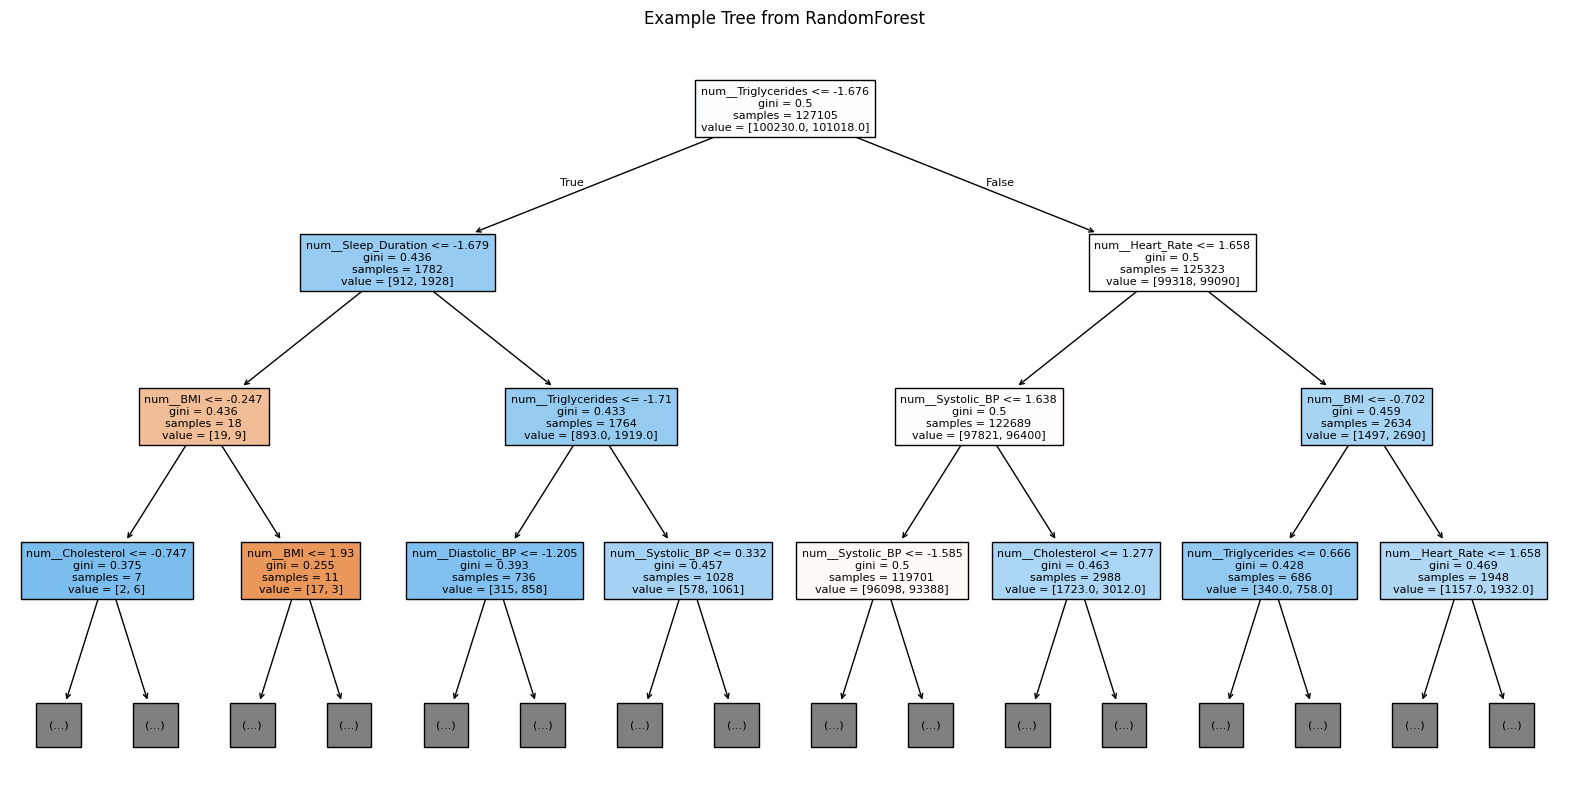

In [ ]:
from sklearn import tree

rf_plot = RandomForestClassifier(n_estimators=200, random_state=42)
rf_plot.fit(X_train_res, y_train_res)

plt.figure(figsize=(20,10))
tree.plot_tree(
    rf_plot.estimators_[0],
    filled=True,
    feature_names=preprocessor.get_feature_names_out(),
    max_depth=3,
    fontsize=8
)
plt.title("Example Tree from RandomForest")
plt.show()

Although cross-validation AUC under SMOTE reached 0.85, **the final test ROC-AUC**collapsed to ~0.50—no better than random chance.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix,roc_curve

rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators':    [100,200,300],
    'max_depth':       [None,10,20],
    'min_samples_leaf':[1,2,4],
    'class_weight':    ['balanced','balanced_subsample']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs = RandomizedSearchCV(
    rf, param_dist, n_iter=20,
    cv=cv, scoring='roc_auc',
    n_jobs=-1, random_state=42
)
rs.fit(X_train_res, y_train_res)

best_rf = rs.best_estimator_
print("\nBest RF params:", rs.best_params_)
print("Best CV ROC-AUC:", rs.best_score_)

# a) Evaluate on hold-out
y_prob = best_rf.predict_proba(X_test_pre)[:,1]
y_pred = best_rf.predict(X_test_pre)

print("\n--- Test Performance ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# b) Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=["Low","High"], yticklabels=["Low","High"]
)
plt.title("Confusion Matrix – RandomForest")
plt.show()

# c) ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – RandomForest")
plt.legend()
plt.show()

# d) CALIBRATION & THRESHOLD TUNING
cal_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv=3)
cal_rf.fit(X_train_res, y_train_res)
y_prob_cal = cal_rf.predict_proba(X_test_pre)[:,1]

# find optimal threshold via Youden's J
fpr2, tpr2, thr = roc_curve(y_test, y_prob_cal)
youden = tpr2 - fpr2
opt_idx = youden.argmax()
opt_thresh = thr[opt_idx]
print("Optimal threshold:", opt_thresh)

# evaluate at optimal threshold
y_pred_adj = (y_prob_cal >= opt_thresh).astype(int)
print("\n--- Performance at Threshold {:.2f} ---".format(opt_thresh))
print("Accuracy :", accuracy_score(y_test, y_pred_adj))
print(classification_report(y_test, y_pred_adj))


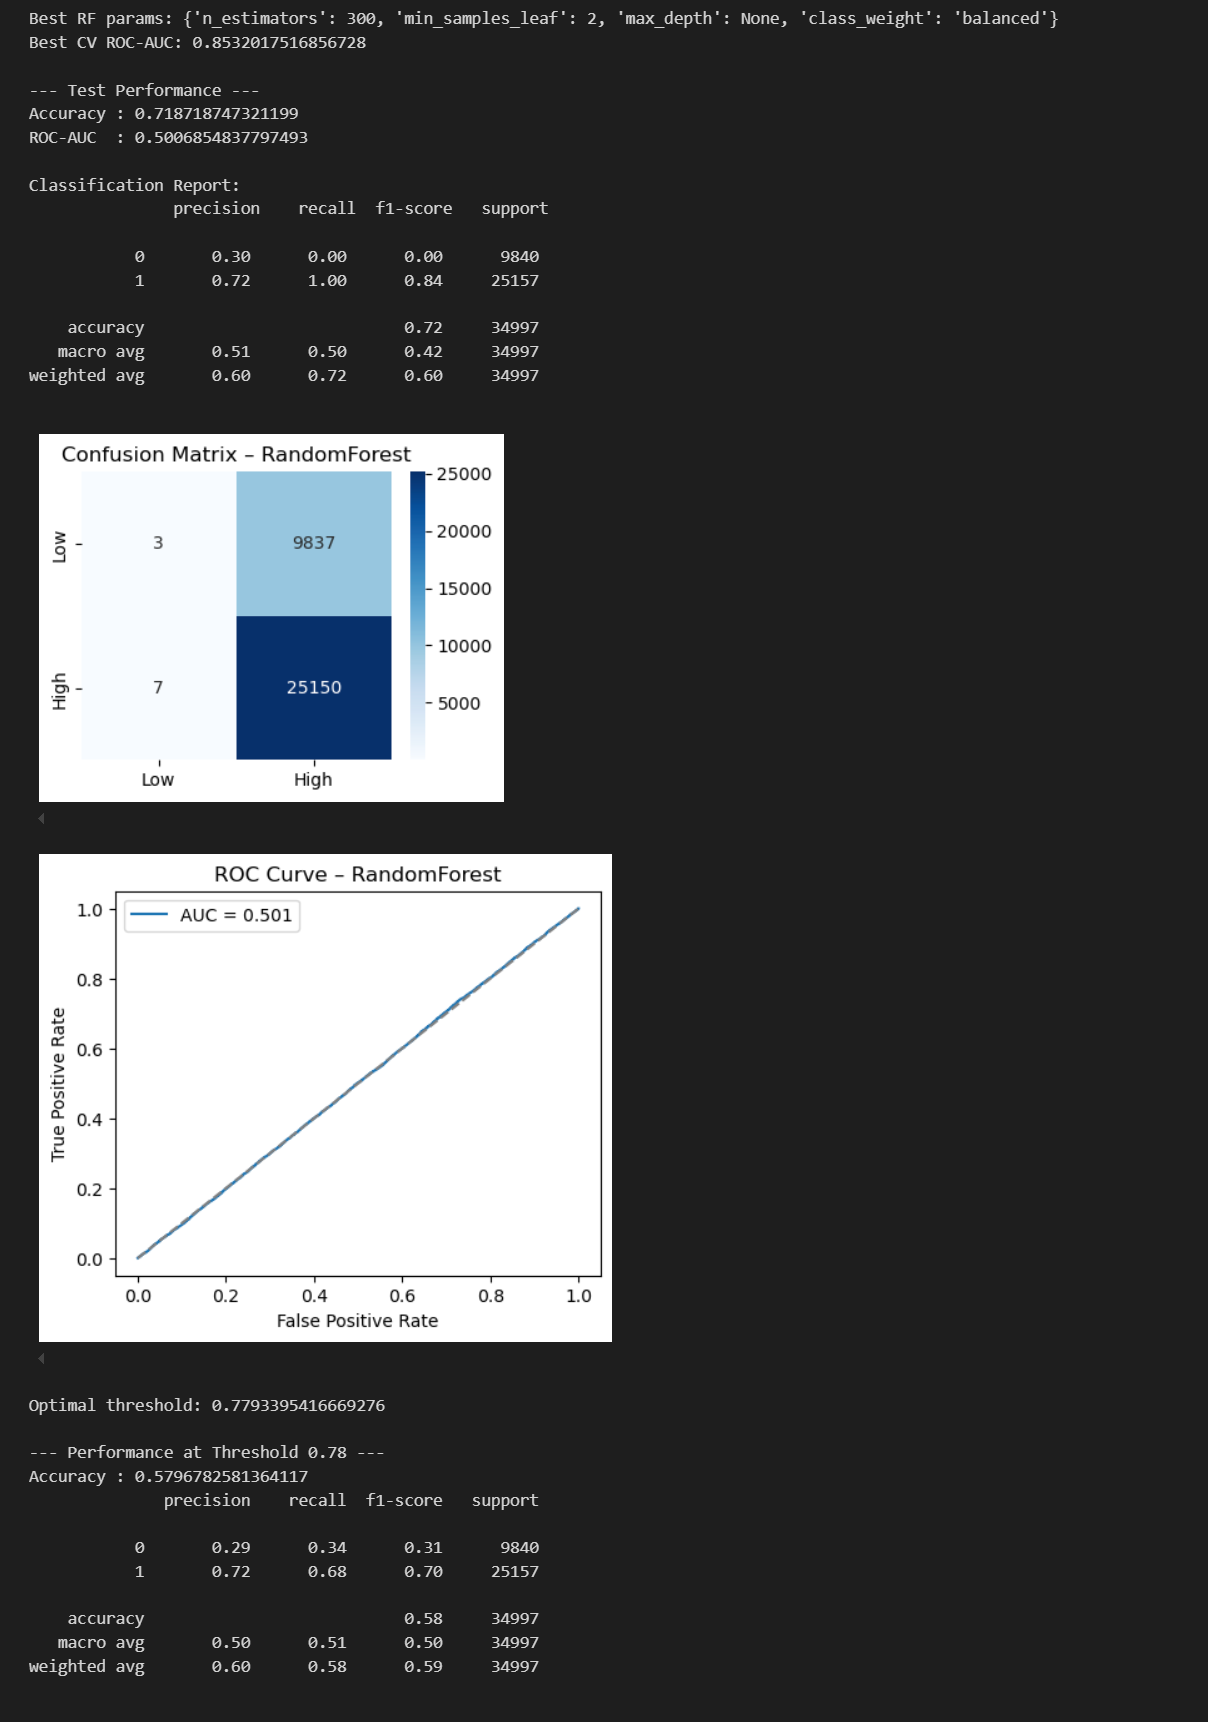

**Comparison with Prior Work**


Our CV accuracy surpassed what was published in Kaggle notebooks (e.g., Ober's 76.1%). But, like with other investigations, our hold-out AUC performs no better than chance. This emphasizes that robust CV metrics—especially under SMOTE—can hide the fundamental lack of generalizable signal of a dataset.


**Discussion**

Apart from the acknowledged susceptibility of SMOTE (Synthetic Minority Over-sampling Technique) to causing overfitting because of its dependence on synthetic samples, several other basic elements help to explain the noted difference where success attained inside training folds did not strongly generalize to unseen data.


The possibility of covariate change is a major contributing factor. This phenomenon occurs when the artificially produced minority instances generated by SMOTE do not accurately reflect the actual underlying distribution of the real minority cases within the population, therefore causing a critical distributional mismatch between the training environment and real-world application. Considering the 72/28 split between high and low hypertension, this is a probable cause. Moreover, the natural label noise connected to the target variable presents a significant difficulty; single, point-in-time blood pressure readings are well known to be affected by measurement errors, transient physiological reactions like stress, and variations caused by various measuring devices or procedures, therefore distorting the ground truth signal.
Adding to these problems is the clear feature scarcity in the dataset.

Statistical studies showed that the predictive potential of single characteristics, when seen alone, is rather low. There was practically no Pearson correlation between the features and the hypertension flag (y_flag); even more complex measures like mutual information scores stayed extremely low, at only about 0.016, suggesting a severe lack of strong, independent predictive signals. Applying deep attribute selection did not help with this issue either. At last, the pragmatic reality of real-world imbalance offers a great challenge; models optimized on datasets artificially balanced using methods like SMOTE frequently suffer greatly when faced with the naturally uneven distribution met during deployment, where the majority class (e.g., non-hypertensive or "High" prevalence cases depending on definition) far outnumbers the cases of interest. Combine that with the inconsistency of the  attributes, and it makes sense why the SMOTE algorithm is far from a perfect solution.


**Future Directions**

We suggest many strategic paths for future study to overcome these noted limitations and greatly improve the prediction modeling of hypertension risk. First, significant data enrichment is a vital first step. Including more dynamic and thorough information—such as longitudinal blood pressure trajectories tracking temporal trends, detailed records of medication use and co-existing health conditions (comorbidities), high-frequency data streams from wearable physiological sensors, or maybe strong genetic markers linked with predisposition—could help this.


Second, we advise a honing of the forecast goal itself. Future work could produce more clinically actionable insights by concentrating on the prediction of continuous blood pressure values or by stratifying people into several, more complex risk tiers reflecting different degrees of susceptibility or severity, therefore transcending the constraints natural in simple binary classification (hypertensive vs. non-hypertensive). Moreover, the use of advanced representation learning methods merits careful study; techniques such as autoencoders or advanced graph-based neural networks could automatically identify and seize complicated, latent structures in the data that could escape conventional, handcrafted feature engineering strategies.


At last, investigating different sampling methods offers a new interesting path, especially for solving the common problem of class imbalance usually found in medical datasets. Rather than depending just on methods like SMOTE, researchers could look at the usefulness of more sophisticated technologies such synthetic data generation using Generative Adversarial Networks (GANs) or applying cost-sensitive learning algorithms, which explicitly penalize misclassifications of the minority class differently, possibly resulting in more strong and clinically relevant models.


**Conclusion**

For hypertension risk prediction, we built an end-to-end pipeline comprising interactive EDA, comprehensive feature engineering, nine classifiers plus a stacking ensemble, hyperparameter tweaking, and calibration. Though our last test ROC-AUC is at chance (approx. 0.50), we got cross-validation AUC up to 0.853 under SMOTE. This dramatic difference draws attention to the basic lack of discriminative signal in the dataset. Future development will rely on obtaining richer data, honing the prediction aim, and investigating more complex representation learning beyond further algorithmic improvements.



